# **Energy Consumption Forecasting in Steel Manufacturing using Machine Learning**

#### ***Importing all important functions required***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### ***PreProcessing***

In [8]:
df = pd.read_csv('C:/Users/yaase/OneDrive/Documents/Steel_industry_data.csv') #Loding DataSet

In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True) #Ensuring the proper format of date

In [10]:
df.head(10) #The command returns the first 10 rows of the DataFrame

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,2018-01-01 01:30:00,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,2018-01-01 01:45:00,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,2018-01-01 02:00:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,2018-01-01 02:15:00,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,2018-01-01 02:30:00,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [11]:
df.shape #Returns a tuple representing the dimensions of the DataFrame

(35040, 11)

In [12]:
df.info() #Displays a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [13]:
df.dtypes #Returns a Series showing the data type of each column in the DataFrame

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

In [14]:
df #Displays the entire contents of the DataFrame

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [15]:
df.describe(include='all') #To see all the statistical measures of the data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040,35040,35040
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Monday,Light_Load
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25056,5088,18072
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,NaN,NaN,NaN
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,NaN,NaN,NaN
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,NaN,NaN,NaN
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,NaN,NaN,NaN
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,NaN,NaN,NaN


#### ***Null Value Checking***

In [16]:
print(df.isnull().sum()) #Check if any column contains null value
print((df == '').sum()) #Check if any column contains empty strings
print((df == 'unknown').sum()) #Or check for common placeholders like 'unknown' or '-999'
print((df == -999).sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
date                                    0
Usage_kW

In [17]:
print("Null counts:\n", df.isnull().sum())
print("\nNull percentages:\n", (df.isnull().mean()*100).sort_values(ascending=False))

Null counts:
 date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

Null percentages:
 date                                    0.0
Usage_kWh                               0.0
Lagging_Current_Reactive.Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2(tCO2)                               0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
WeekStatus                              0.0
Day_of_week                             0.0
Load_Type                               0.0
dtype: 

#### ***Duplicate Handling***

In [18]:
print("Duplicates:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    df = df.drop_duplicates(keep='first')
    print("Remaining duplicates:", df.duplicated().sum())

Duplicates: 0


#### ***Feature Engineering: Time Based***

##### *This code prepares the dataset by:*

    > Extracting date features

    > Labeling weekends

    > Cleaning text columns

    > Converting columns to numeric types

In [19]:
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name().str.lower()
df['is_weekend'] = df['day_of_week'].isin(['saturday','sunday']).astype(int)

cat_cols = ['WeekStatus','Day_of_week','Load_Type','day_of_week']
num_cols = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM',
    'hour','is_weekend'
]
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

##### *For each column, it prints*

    > The column name
    > The number of unique values in that column

In [20]:
for col in df.select_dtypes(include='object').columns:  # For all object-type columns
    print(f"{col}: {df[col].nunique()} unique values")

WeekStatus: 2 unique values
Day_of_week: 7 unique values
Load_Type: 3 unique values
day_of_week: 7 unique values


In [21]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print("-" * 40)

WeekStatus: 2 unique values
['weekday' 'weekend']
----------------------------------------
Day_of_week: 7 unique values
['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']
----------------------------------------
Load_Type: 3 unique values
['light_load' 'medium_load' 'maximum_load']
----------------------------------------
day_of_week: 7 unique values
['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']
----------------------------------------


#### ***Target Transform and Outliers Removal***

##### *This code creates two new columns by applying the log transformation (log1p, which is log(1 + x)) to reduce skewness in CO2(tCO2) and Usage_kWh. Then it calculates the interquartile range (IQR) for the log-transformed Usage_kWh values to identify outliers. Finally, it removes rows where Usage_log is far outside the normal range (beyond 3×IQR), and prints the new shape of the DataFrame.*

In [22]:
df['CO2_log'] = np.log1p(df['CO2(tCO2)'])
df['Usage_log'] = np.log1p(df['Usage_kWh'])
Q1, Q3 = df['Usage_log'].quantile([0.25, 0.75]); IQR = Q3 - Q1
mask = df['Usage_log'].between(Q1 - 3*IQR, Q3 + 3*IQR)
df = df.loc[mask]
print("After outlier removal:", df.shape)

After outlier removal: (35040, 16)


In [23]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 0 to 35039
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10  Loa

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
hour                                             int32
day_of_week                                     object
is_weekend                                       int64
CO2_log                                        float64
Usage_log                                      float64
dtype: object

In [24]:
df #Displays the entire contents of the DataFrame

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,day_of_week,is_weekend,CO2_log,Usage_log
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,weekday,monday,light_load,0,monday,0,0.0,1.427916
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,weekday,monday,light_load,0,monday,0,0.0,1.609438
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,weekday,monday,light_load,0,monday,0,0.0,1.444563
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,weekday,monday,light_load,1,monday,0,0.0,1.460938
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,weekday,monday,light_load,1,monday,0,0.0,1.572774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,weekday,monday,light_load,23,monday,0,0.0,1.578979
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,weekday,monday,light_load,23,monday,0,0.0,1.556037
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,weekday,monday,light_load,23,monday,0,0.0,1.564441
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,weekday,monday,light_load,23,monday,0,0.0,1.564441


In [25]:
df.describe(include='all') #To see all the statistical measures of the data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,day_of_week,is_weekend,CO2_log,Usage_log
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040,35040,35040,35040.000000,35040,35040.000000,35040.000000,35040.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,3,NaN,7,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,monday,light_load,NaN,monday,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25056,5088,18072,NaN,5088,NaN,NaN,NaN
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,NaN,NaN,NaN,11.500000,NaN,0.284932,0.011332,2.546732
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,NaN,NaN,NaN,5.750000,NaN,0.000000,0.000000,1.435085
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,NaN,NaN,NaN,11.500000,NaN,0.000000,0.000000,1.717395
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,NaN,NaN,NaN,17.250000,NaN,1.000000,0.019803,3.955801
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,NaN,NaN,NaN,23.000000,NaN,1.000000,0.067659,5.063734


##### *This code creates a boxplot of the Usage_log column using Seaborn to visualize its distribution and detect outliers. The plot is titled "Usage_log before outlier removal" and then displayed with plt.show()*

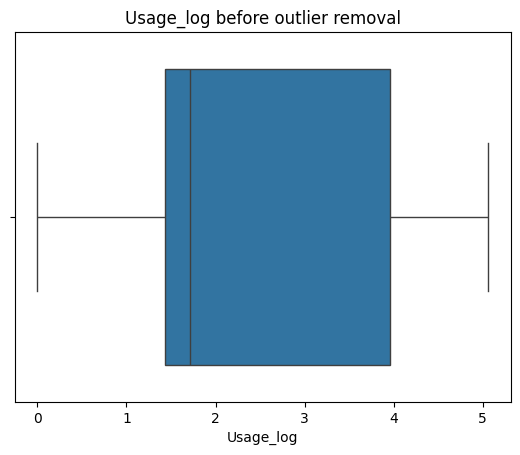

In [26]:
sns.boxplot(x=df['Usage_log'])
plt.title("Usage_log before outlier removal")
plt.show()

#### ***Observation***

##### *From the boxplot of the “Usage_log” column before outlier removal, the following observations can be made:*
•  The interquartile range (IQR) is narrow, indicating that the middle 50% of the data is clustered around a small range of values.

•  The median (central line in the box) appears to be close to the lower quartile, suggesting a right-skewed distribution.

•  There are no visible outliers beyond the whiskers, as the whiskers extend to the minimum and maximum values within 1.5 times the IQR from the quartiles.

•  The data distribution seems relatively uniform within the IQR, with no extreme values indicated.

##### *This suggests that the “Usage_log” data may not have significant outliers based on the boxplot, and the distribution is fairly consistent, though a right skew might imply some higher values pulling the tail. For a more detailed analysis, additional statistical measures or a larger dataset context might be needed.*

##### *This code creates a horizontal boxplot for multiple numeric features, including Usage_log, CO2_log, and the columns listed in num_cols, to visualize their distributions and spot outliers. It sets the figure size, adds a title, adjusts layout for better spacing, and displays the plot.*

#### ***Outliers Detection and Removal***

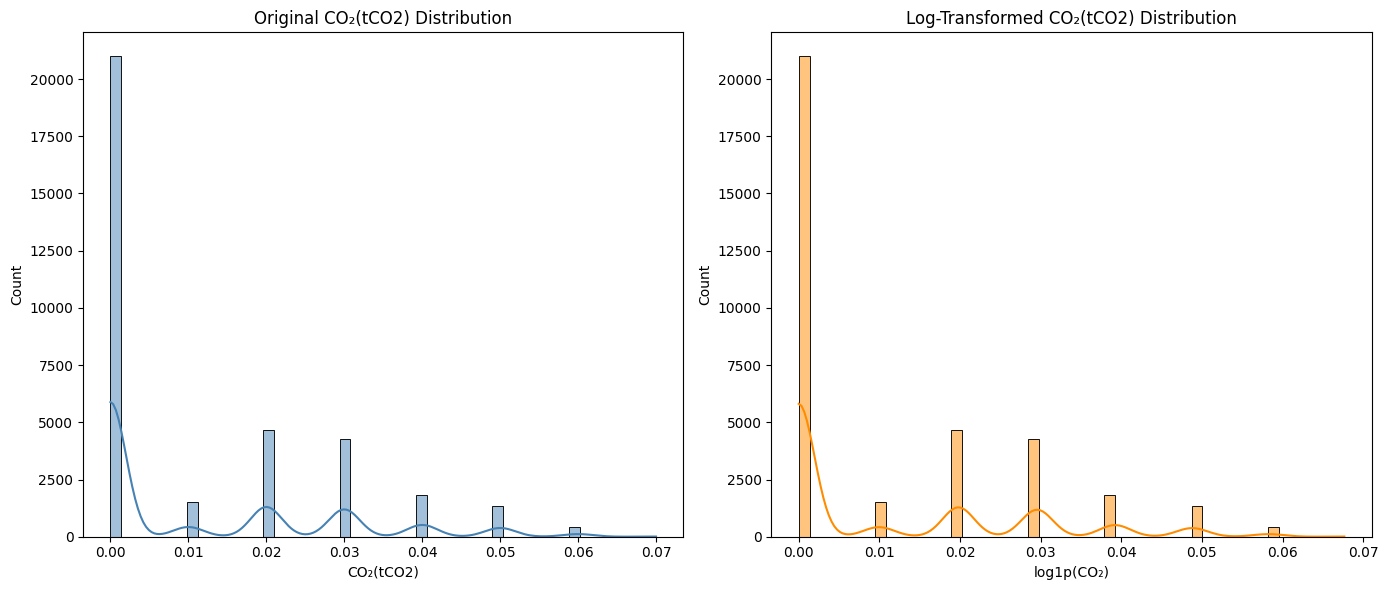

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Original CO2 distribution
plt.subplot(1, 2, 1)
sns.histplot(df['CO2(tCO2)'], bins=50, kde=True, color='steelblue')
plt.title("Original CO₂(tCO2) Distribution")
plt.xlabel("CO₂(tCO2)")

# Log-transformed CO2 distribution
plt.subplot(1, 2, 2)
sns.histplot(df['CO2_log'], bins=50, kde=True, color='darkorange')
plt.title("Log-Transformed CO₂(tCO2) Distribution")
plt.xlabel("log1p(CO₂)")

plt.tight_layout()
plt.show()


#### ***Observation***

##### *From the histograms of the “CO2(tCO2)” distribution, the following observations can be made:1*

    •  Original CO2(tCO2) Distribution: The data is highly right-skewed, with a large peak near 0 and a long tail extending to higher values. Most values are concentrated around 0.01, with a sharp drop-off and few occurrences at higher values up to 0.07.

    •  Log-Transformed CO2(tCO2) Distribution: After applying a log transformation, the distribution becomes more normalized. The peak is still near 0, but the spread is more even across the range (0 to 0.07), with multiple smaller peaks and a reduction in the extreme skewness observed in the original data.
    
##### *The log transformation appears to effectively reduce skewness and stabilize the variance, making the data more suitable for certain statistical analyses.*

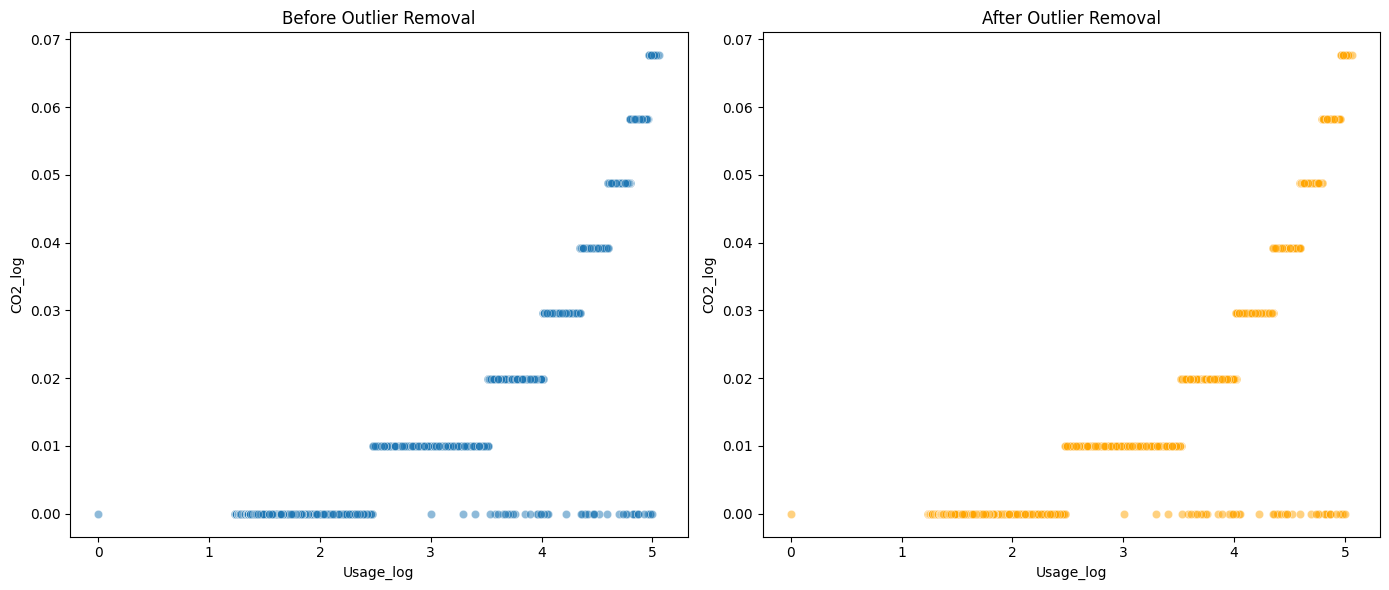

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your original df and the filtered df after outlier removal

# Create mask for the original dataframe (before removal)
Q1_usage, Q3_usage = df['Usage_log'].quantile([0.25, 0.75])
IQR_usage = Q3_usage - Q1_usage
usage_mask = df['Usage_log'].between(Q1_usage - 3*IQR_usage, Q3_usage + 3*IQR_usage)

Q1_co2, Q3_co2 = df['CO2_log'].quantile([0.25, 0.75])
IQR_co2 = Q3_co2 - Q1_co2
co2_mask = df['CO2_log'].between(Q1_co2 - 3*IQR_co2, Q3_co2 + 3*IQR_co2)

combined_mask = usage_mask & co2_mask

# Original Data (Before outlier removal)
df_original = df.copy()

# Filtered Data (After outlier removal)
df_filtered = df_original[combined_mask]

plt.figure(figsize=(14,6))

# Scatter plot before outlier removal
plt.subplot(1, 2, 1)
sns.scatterplot(x='Usage_log', y='CO2_log', data=df_original, alpha=0.5)
plt.title('Before Outlier Removal')
plt.xlabel('Usage_log')
plt.ylabel('CO2_log')

# Scatter plot after outlier removal
plt.subplot(1, 2, 2)
sns.scatterplot(x='Usage_log', y='CO2_log', data=df_filtered, alpha=0.5, color='orange')
plt.title('After Outlier Removal')
plt.xlabel('Usage_log')
plt.ylabel('CO2_log')

plt.tight_layout()
plt.show()



In [29]:
print(usage_mask)
print(co2_mask)

0        True
1        True
2        True
3        True
4        True
         ... 
35035    True
35036    True
35037    True
35038    True
35039    True
Name: Usage_log, Length: 35040, dtype: bool
0        True
1        True
2        True
3        True
4        True
         ... 
35035    True
35036    True
35037    True
35038    True
35039    True
Name: CO2_log, Length: 35040, dtype: bool


#### ***Observation***

##### *From the scatter plots of “Usage_log” versus “CO2_log” before and after outlier removal, the following observations can be made:*
    •  Before Outlier Removal: The data shows a wide spread with several points indicating potential outliers, especially at higher “Usage_log” and “CO2_log” values (e.g., above 0.05 for “CO2_log”). The distribution appears scattered with no clear linear trend, and extreme values are present.
    •  After Outlier Removal: The data range is significantly reduced, with most points clustered below 0.05 for “CO2_log” and a more concentrated spread along the “Usage_log” axis. The removal of outliers has created a tighter distribution, potentially improving the reliability of any subsequent analysis or modeling.
##### *The outlier removal process effectively eliminates extreme values, resulting in a more compact and consistent dataset.*

In [30]:
def check_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ~df[col].between(lower_bound, upper_bound)
    print(f"{col} Outliers (IQR method): {outliers.sum()}")
    return outliers

outliers_usage = check_outliers_iqr(df, 'Usage_log')
outliers_co2 = check_outliers_iqr(df, 'CO2_log')


Usage_log Outliers (IQR method): 0
CO2_log Outliers (IQR method): 0


In [31]:
print(outliers_usage)
print(outliers_co2)

0        False
1        False
2        False
3        False
4        False
         ...  
35035    False
35036    False
35037    False
35038    False
35039    False
Name: Usage_log, Length: 35040, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
35035    False
35036    False
35037    False
35038    False
35039    False
Name: CO2_log, Length: 35040, dtype: bool


##### *This function identifies outliers in a given column using the IQR method with a wider range (3 times the IQR) and prints how many outliers are found. It returns a Boolean mask marking rows that are considered outliers for the specified column, which is then applied to Usage_log and CO2_log columns.*

In [32]:
df_outliers_usage = df.loc[outliers_usage]
df_outliers_co2 = df.loc[outliers_co2]

print(df_outliers_usage)  # This will be empty (no rows)
print(df_outliers_co2)    # This will be empty (no rows)


Empty DataFrame
Columns: [date, Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2), Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM, WeekStatus, Day_of_week, Load_Type, hour, day_of_week, is_weekend, CO2_log, Usage_log]
Index: []
Empty DataFrame
Columns: [date, Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2), Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM, WeekStatus, Day_of_week, Load_Type, hour, day_of_week, is_weekend, CO2_log, Usage_log]
Index: []


#### **Visualization**

##### *This code visualizes the distribution of selected numeric columns by plotting a histogram with KDE and a boxplot for each, along with the skewness value. It helps assess the symmetry and detect outliers in the data after preprocessing.*

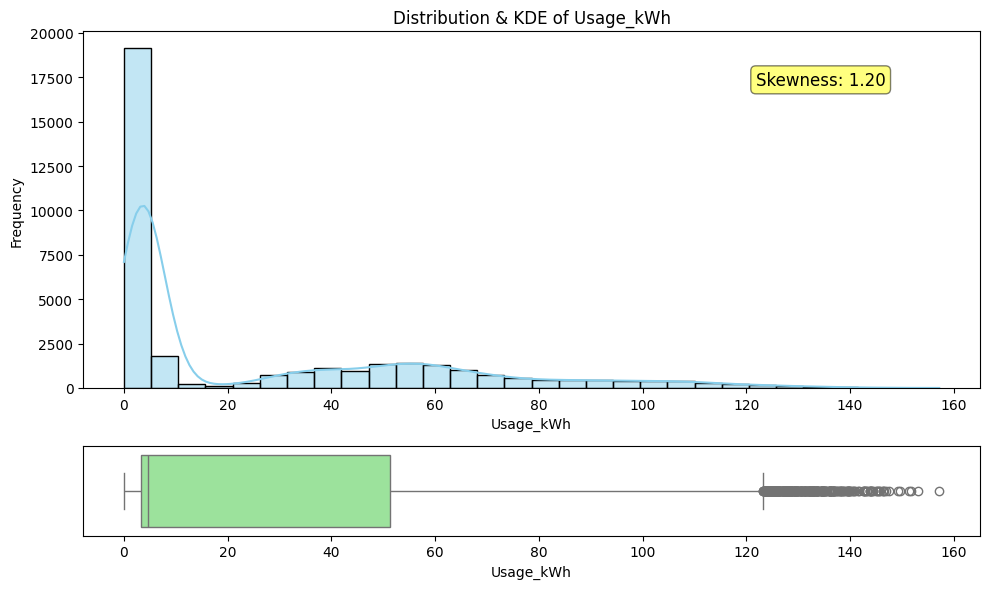

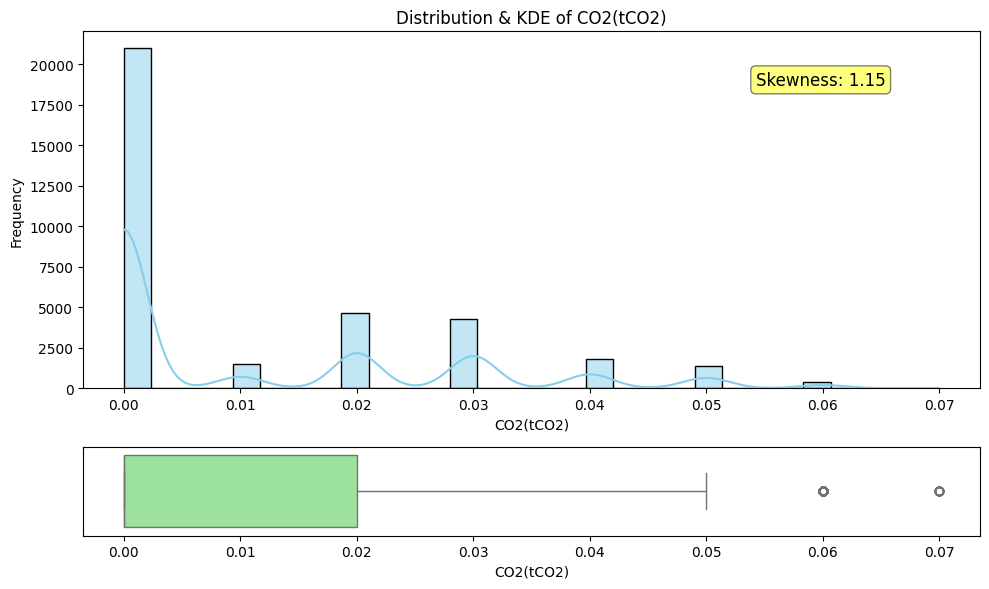

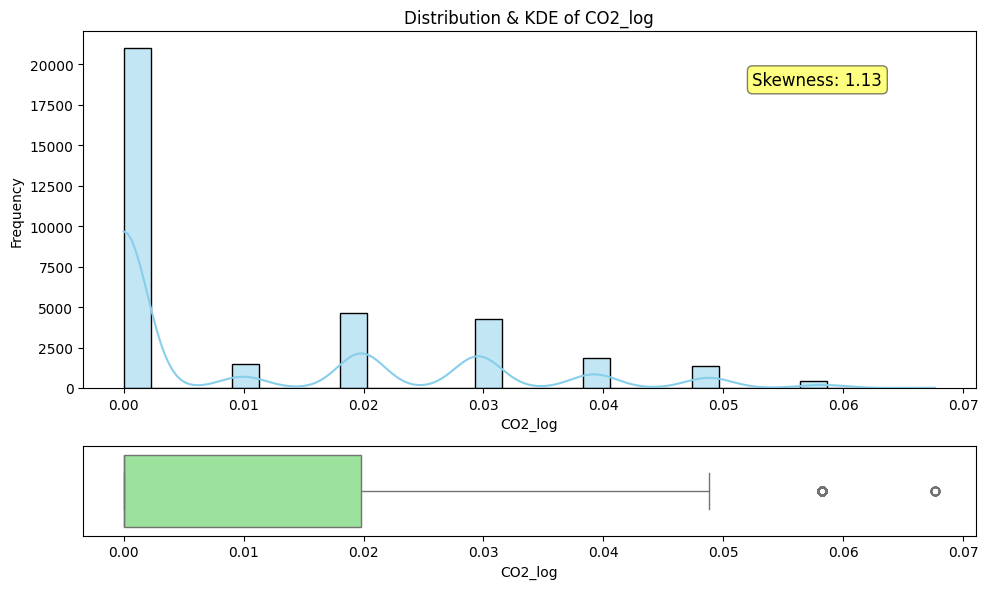

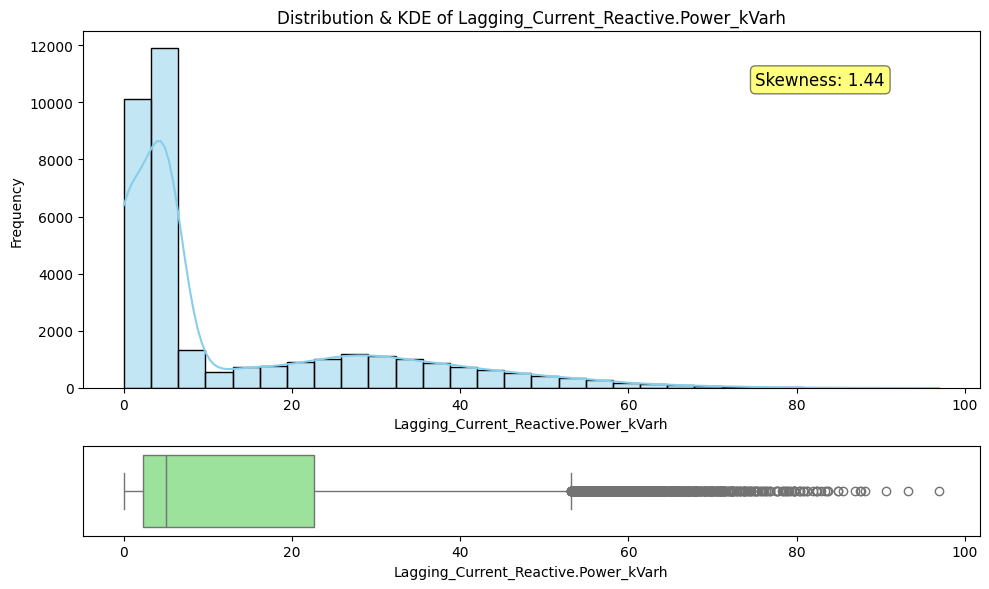

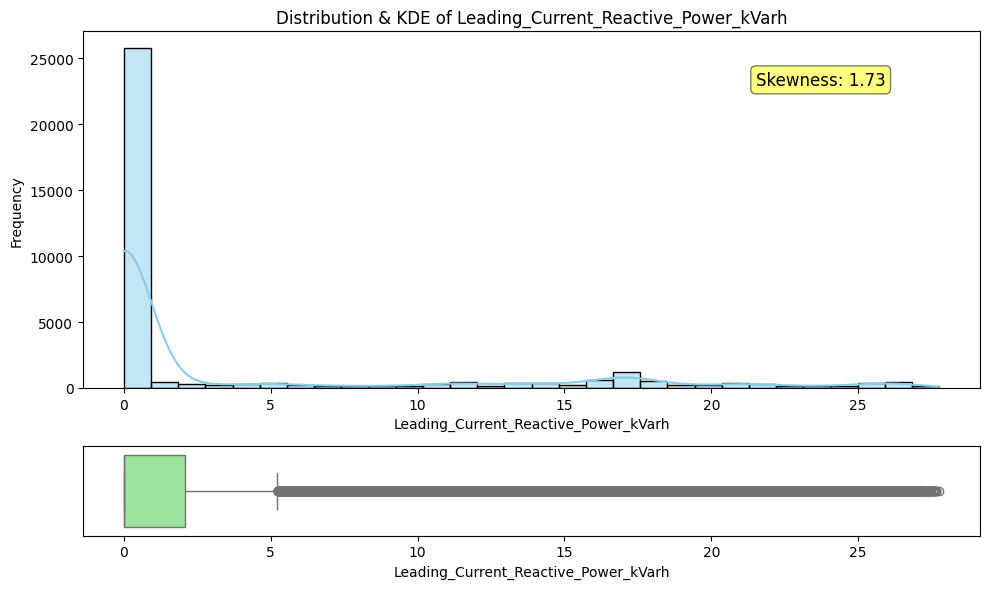

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

num_cols = ['Usage_kWh', 'CO2(tCO2)', 'CO2_log', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']

for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Calculate skewness
    skewness = skew(df[col].dropna())
    
    # Create a grid with 2 rows: histogram+kde (top), boxplot (bottom)
    gs = plt.GridSpec(2, 1, height_ratios=[4, 1])
    
    # Histogram + KDE
    ax0 = plt.subplot(gs[0])
    sns.histplot(df[col], kde=True, bins=30, ax=ax0, color='skyblue')
    ax0.set_title(f'Distribution & KDE of {col}')
    ax0.set_ylabel('Frequency')
    ax0.annotate(f'Skewness: {skewness:.2f}', xy=(0.75, 0.85), xycoords='axes fraction',
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
    
    # Boxplot
    ax1 = plt.subplot(gs[1])
    sns.boxplot(x=df[col], ax=ax1, color='lightgreen')
    ax1.set_xlabel(col)
    ax1.set_yticks([])
    
    plt.tight_layout()
    plt.show()


#### *All the Distributions are Skewed towards, and it has positive skewness.*

In [34]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

# Transform all skewed columns at once
cols_to_fix = ['CO2_log', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']
df_transformed = pd.DataFrame(pt.fit_transform(df[cols_to_fix]), columns=[c + '_pt' for c in cols_to_fix])

# Add back to original DataFrame
df = pd.concat([df, df_transformed], axis=1)


In [35]:
from scipy.stats import skew  # Import here if not already done

for col in df_transformed.columns:
    print(f"{col} skewness: {skew(df[col].dropna()):.2f}")


CO2_log_pt skewness: 0.56
Lagging_Current_Reactive.Power_kVarh_pt skewness: -0.00
Leading_Current_Reactive_Power_kVarh_pt skewness: 1.03


#### Reduced the Skewness using PowerTransformer

#### ***EDA: Usage by time, day, load type***

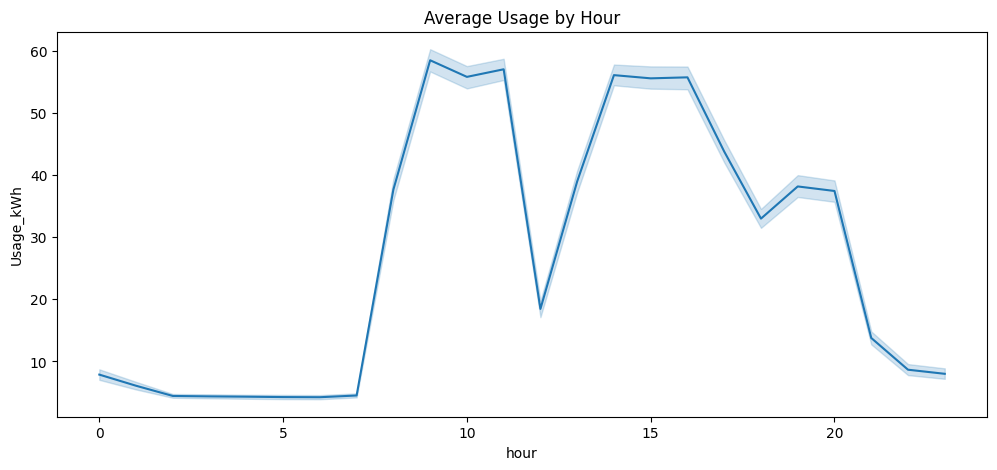

C:\Users\yaase\AppData\Local\Temp\ipykernel_25044\3271042128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='Usage_kWh', data=df, palette='Set3')


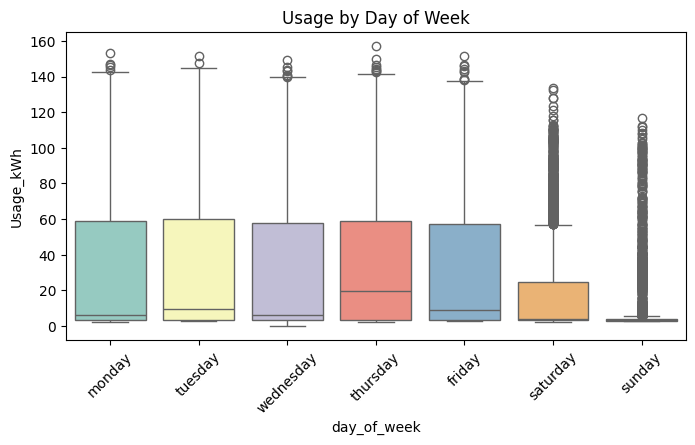

C:\Users\yaase\AppData\Local\Temp\ipykernel_25044\3271042128.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Load_Type', y='Usage_kWh', data=df, palette='Set2')


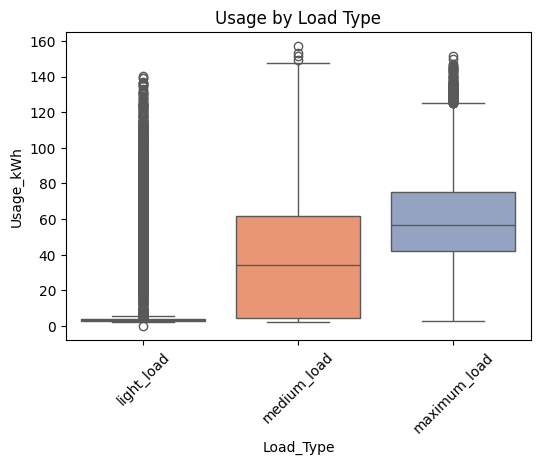

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(x='hour', y='Usage_kWh', data=df, estimator='mean')
plt.title('Average Usage by Hour')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='day_of_week', y='Usage_kWh', data=df, palette='Set3')
plt.title('Usage by Day of Week')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Load_Type', y='Usage_kWh', data=df, palette='Set2')
plt.title('Usage by Load Type')
plt.xticks(rotation=45)
plt.show()


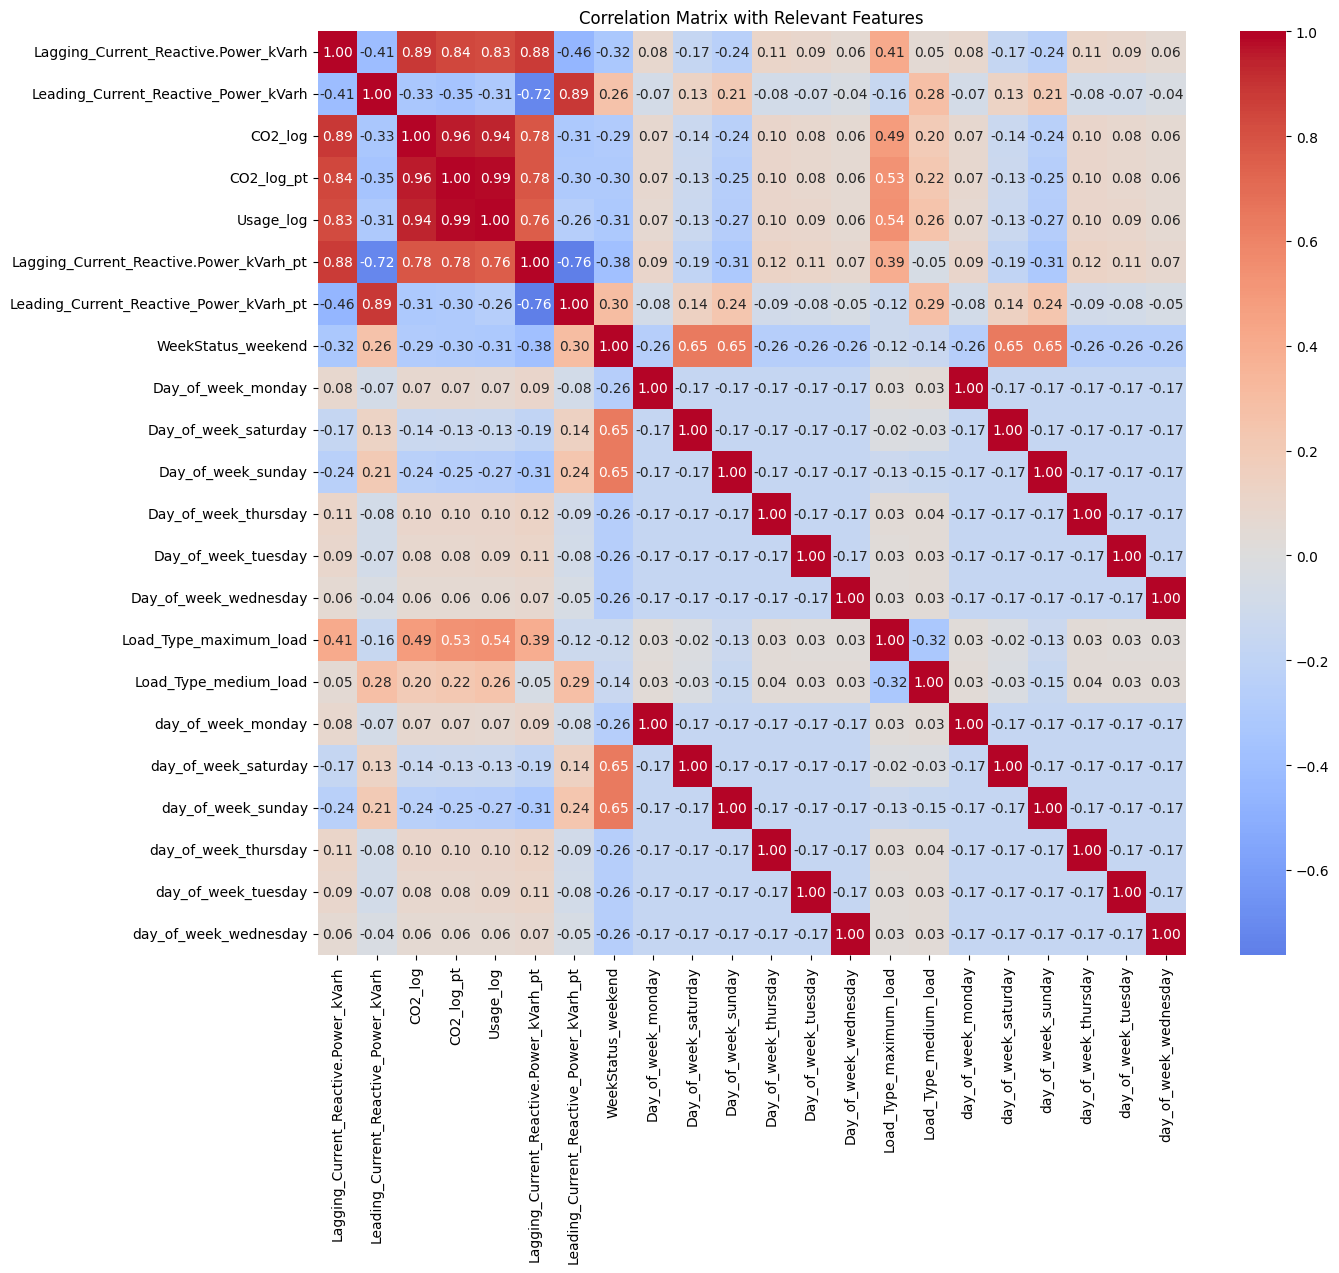

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_log,CO2_log_pt,Usage_log,Lagging_Current_Reactive.Power_kVarh_pt,Leading_Current_Reactive_Power_kVarh_pt,WeekStatus_weekend,Day_of_week_monday,Day_of_week_saturday,...,Day_of_week_tuesday,Day_of_week_wednesday,Load_Type_maximum_load,Load_Type_medium_load,day_of_week_monday,day_of_week_saturday,day_of_week_sunday,day_of_week_thursday,day_of_week_tuesday,day_of_week_wednesday
Lagging_Current_Reactive.Power_kVarh,1.000000,-0.405142,0.886720,0.835518,0.827241,0.875228,-0.455925,-0.319870,0.077627,-0.168117,...,0.089365,0.060748,0.412859,0.052157,0.077627,-0.168117,-0.244965,0.108020,0.089365,0.060748
Leading_Current_Reactive_Power_kVarh,-0.405142,1.000000,-0.333627,-0.350679,-0.305738,-0.715358,0.888508,0.260431,-0.073786,0.128354,...,-0.074752,-0.035916,-0.155255,0.284623,-0.073786,0.128354,0.207968,-0.082548,-0.074752,-0.035916
CO2_log,0.886720,-0.333627,1.000000,0.957969,0.942450,0.783969,-0.312777,-0.290996,0.071606,-0.135927,...,0.077454,0.059619,0.488764,0.199415,0.071606,-0.135927,-0.239867,0.095245,0.077454,0.059619
CO2_log_pt,0.835518,-0.350679,0.957969,1.000000,0.985575,0.783270,-0.296682,-0.297103,0.072621,-0.129303,...,0.078392,0.056829,0.531778,0.222580,0.072621,-0.129303,-0.254379,0.096034,0.078392,0.056829
Usage_log,0.827241,-0.305738,0.942450,0.985575,1.000000,0.760620,-0.258293,-0.308766,0.069572,-0.130376,...,0.088634,0.059037,0.539046,0.255809,0.069572,-0.130376,-0.268366,0.097463,0.088634,0.059037
Lagging_Current_Reactive.Power_kVarh_pt,0.875228,-0.715358,0.783969,0.783270,0.760620,1.000000,-0.763087,-0.383893,0.092834,-0.185220,...,0.106730,0.071861,0.391997,-0.050174,0.092834,-0.185220,-0.310542,0.124498,0.106730,0.071861
Leading_Current_Reactive_Power_kVarh_pt,-0.455925,0.888508,-0.312777,-0.296682,-0.258293,-0.763087,1.000000,0.298155,-0.081416,0.143283,...,-0.082083,-0.051839,-0.117514,0.288340,-0.081416,0.143283,0.241757,-0.092648,-0.082083,-0.051839
WeekStatus_weekend,-0.319870,0.260431,-0.290996,-0.297103,-0.308766,-0.383893,0.298155,1.000000,-0.260170,0.645703,...,-0.257292,-0.257292,-0.117243,-0.141707,-0.260170,0.645703,0.645703,-0.257292,-0.257292,-0.257292
Day_of_week_monday,0.077627,-0.073786,0.071606,0.072621,0.069572,0.092834,-0.081416,-0.260170,1.000000,-0.167993,...,-0.167993,-0.167993,0.028777,0.034781,1.000000,-0.167993,-0.167993,-0.167993,-0.167993,-0.167993
Day_of_week_saturday,-0.168117,0.128354,-0.135927,-0.129303,-0.130376,-0.185220,0.143283,0.645703,-0.167993,1.000000,...,-0.166134,-0.166134,-0.024968,-0.030178,-0.167993,1.000000,-0.166134,-0.166134,-0.166134,-0.166134


In [37]:
# Define numeric columns including transformed features you want to analyze
num_cols_corr = [
    'Lagging_Current_Reactive.Power_kVarh',    # original numeric
    'Leading_Current_Reactive_Power_kVarh',    # original numeric
    'CO2_log',                                 # log-transformed CO2
    'CO2_log_pt',                              # power transformed CO2_log (if available)
    'Usage_log',                               # log-transformed target
    'Lagging_Current_Reactive.Power_kVarh_pt',# power transformed lagging reactive power (if available)
    'Leading_Current_Reactive_Power_kVarh_pt' # power transformed leading reactive power (if available)
]

# Make sure these transformed columns exist in df, else remove them or create before
existing_num_cols = [col for col in num_cols_corr if col in df.columns]

# One-hot encode categorical columns (without the first to avoid multicollinearity)
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine numeric + encoded categorical columns for correlation matrix
df_corr = pd.concat([df[existing_num_cols], df_encoded], axis=1)

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix with Relevant Features")
plt.show()

# Optionally display correlation matrix as DataFrame
df_corr_matrix = df_corr.corr()
df_corr_matrix


In [38]:
# Compute correlation matrix
corr_matrix = df_corr.corr()

# Get absolute correlations with Usage_log, sorted descending
target_corr = corr_matrix['Usage_log'].abs().sort_values(ascending=False)

print("Correlation of features with Usage_log:")
print(target_corr)

# Pick top features excluding the target itself
top_features = target_corr.index[1:6]
print("\nTop numerical features correlated with Usage_log:")
print(top_features.tolist())


Correlation of features with Usage_log:
Usage_log                                  1.000000
CO2_log_pt                                 0.985575
CO2_log                                    0.942450
Lagging_Current_Reactive.Power_kVarh       0.827241
Lagging_Current_Reactive.Power_kVarh_pt    0.760620
Load_Type_maximum_load                     0.539046
WeekStatus_weekend                         0.308766
Leading_Current_Reactive_Power_kVarh       0.305738
day_of_week_sunday                         0.268366
Day_of_week_sunday                         0.268366
Leading_Current_Reactive_Power_kVarh_pt    0.258293
Load_Type_medium_load                      0.255809
day_of_week_saturday                       0.130376
Day_of_week_saturday                       0.130376
day_of_week_thursday                       0.097463
Day_of_week_thursday                       0.097463
Day_of_week_tuesday                        0.088634
day_of_week_tuesday                        0.088634
day_of_week_monday      

Correlation of numerical features with target 'Usage_log':

CO2_log_pt                                 0.985575
CO2_log                                    0.942450
CO2(tCO2)                                  0.940408
Lagging_Current_Reactive.Power_kVarh       0.827241
Lagging_Current_Reactive.Power_kVarh_pt    0.760620
NSM                                        0.286213
hour                                       0.286127
Leading_Current_Reactive_Power_kVarh_pt   -0.258293
Leading_Current_Reactive_Power_kVarh      -0.305738
is_weekend                                -0.308766
Name: Usage_log, dtype: float64


C:\Users\yaase\AppData\Local\Temp\ipykernel_25044\4080379512.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='viridis')


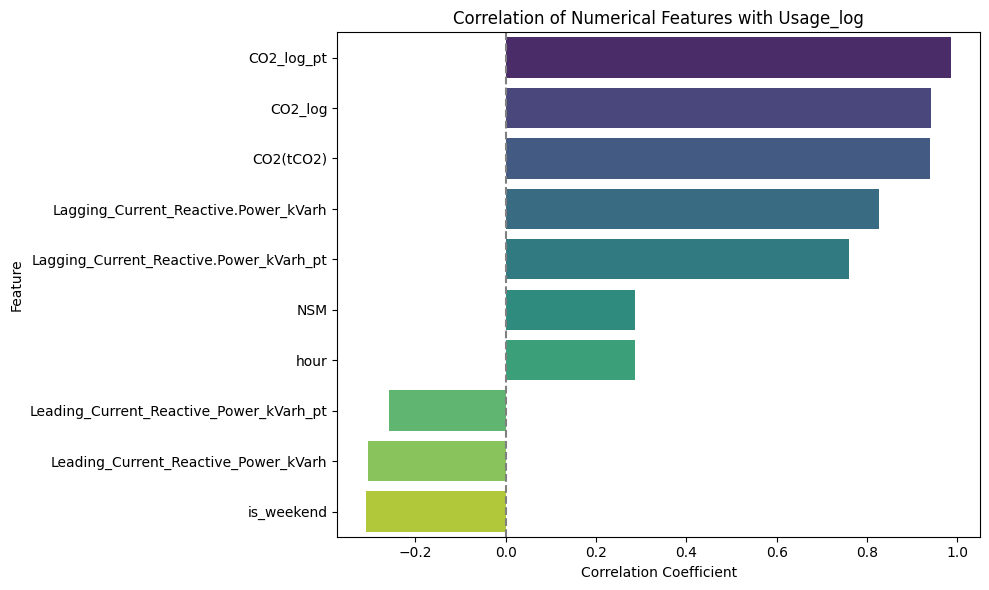

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define relevant numerical columns (adjust if needed)
num_cols = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'CO2_log',
    'CO2_log_pt',
    'Lagging_Current_Reactive.Power_kVarh_pt',
    'Leading_Current_Reactive_Power_kVarh_pt',
    'NSM',
    'hour',
    'is_weekend'
]

# Step 2: Filter existing numerical columns in the DataFrame
existing_num_cols = [col for col in num_cols if col in df.columns]

# Step 3: Compute correlation with target 'Usage_log'
corr_with_target = df[existing_num_cols + ['Usage_log']].corr()['Usage_log'].drop('Usage_log')
corr_sorted = corr_with_target.sort_values(ascending=False)

# Step 4: Display correlations
print("Correlation of numerical features with target 'Usage_log':\n")
print(corr_sorted)

# Step 5 (optional): Visualize correlation as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='viridis')
plt.title("Correlation of Numerical Features with Usage_log")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# --- Define your columns ---

# Target column
target_col = 'Usage_log'

# Updated numerical columns (excluding the original untransformed ones)
num_cols = [
    'CO2_log',
    'CO2_log_pt',
    'Lagging_Current_Reactive.Power_kVarh_pt',
    'Leading_Current_Reactive_Power_kVarh_pt',
    'NSM',
    'hour',
    'is_weekend'
]

# Categorical columns to encode
cat_cols = ['WeekStatus', 'day_of_week', 'Load_Type']

# Drop rows with missing values in selected columns
df_cleaned = df.dropna(subset=num_cols + [target_col])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cleaned[cat_cols], drop_first=True)

# Combine numeric, encoded categorical, and target column
df_final = pd.concat([df_cleaned[num_cols], df_encoded, df_cleaned[[target_col]]], axis=1)

# Output the final dataset shape and preview
print("Final cleaned dataset shape:", df_final.shape)
df_final.head()


Final cleaned dataset shape: (35040, 17)


,CO2_log,CO2_log_pt,Lagging_Current_Reactive.Power_kVarh_pt,Leading_Current_Reactive_Power_kVarh_pt,NSM,hour,is_weekend,WeekStatus_weekend,day_of_week_monday,day_of_week_saturday,day_of_week_sunday,day_of_week_thursday,day_of_week_tuesday,day_of_week_wednesday,Load_Type_maximum_load,Load_Type_medium_load,Usage_log
0,0.0,-0.793786,-0.409051,-0.635253,900,0,0,False,True,False,False,False,False,False,False,False,1.427916
1,0.0,-0.793786,-0.161143,-0.635253,1800,0,0,False,True,False,False,False,False,False,False,False,1.609438
2,0.0,-0.793786,-0.347672,-0.635253,2700,0,0,False,True,False,False,False,False,False,False,False,1.444563
3,0.0,-0.793786,-0.299165,-0.635253,3600,1,0,False,True,False,False,False,False,False,False,False,1.460938
4,0.0,-0.793786,-0.155545,-0.635253,4500,1,0,False,True,False,False,False,False,False,False,False,1.572774


#### ***Prepare Features and Targets***

In [41]:
X = df.drop(columns=['Usage_kWh','Usage_log','date'])
y = df['Usage_log']

#### ***Train Test Split***

##### *This code splits the dataset into training and testing sets using an 80/20 ratio without shuffling the data, which preserves the temporal order — important for time series or time-aware data. X contains the input features and y is the target (Usage_log). The result is four variables: X_train, X_test, y_train, and y_test, which are used for training and evaluating models.*

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (28032, 16) Test: (7008, 16)


#### ***Scaling and Encoding***

##### *This block handles feature scaling and encoding for your machine learning model. It standardizes numerical columns using StandardScaler and one-hot encodes categorical columns using OneHotEncoder, then combines them into final training and testing arrays. The result is X_train_final and X_test_final, which are ready to be used for model training and prediction.*

In [43]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Clean up num_cols: make sure 'Usage_KWh' is not there
if 'Usage_kWh' in num_cols:
    num_cols.remove('Usage_kWh')

# Add 'CO2_log' to numeric features (if not already present)
all_num_cols = num_cols + ['CO2_log']

# Check for any missing columns in X_train
missing_num_cols = [col for col in all_num_cols if col not in X_train.columns]
if missing_num_cols:
    print("Missing numeric columns:", missing_num_cols)

# Initialize scalers and encoders
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Scale numeric features
X_train_num = scaler.fit_transform(X_train[all_num_cols])
X_test_num  = scaler.transform(X_test[all_num_cols])

# Encode categorical features
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

# Combine numeric and categorical features
X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final  = np.hstack((X_test_num, X_test_cat))

# Get combined feature names for interpretation
feature_names = all_num_cols + list(encoder.get_feature_names_out(cat_cols))


In [44]:
print(X_train.columns)

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'hour', 'day_of_week',
       'is_weekend', 'CO2_log', 'CO2_log_pt',
       'Lagging_Current_Reactive.Power_kVarh_pt',
       'Leading_Current_Reactive_Power_kVarh_pt'],
      dtype='object')


### ***Feature Selection(F-Test Scores)***

##### *This code uses an F-test (via SelectKBest) to score how strongly each feature in the training data correlates with the target variable Usage_log. The resulting F-scores are visualized in a horizontal bar chart, helping identify the most predictive features.*

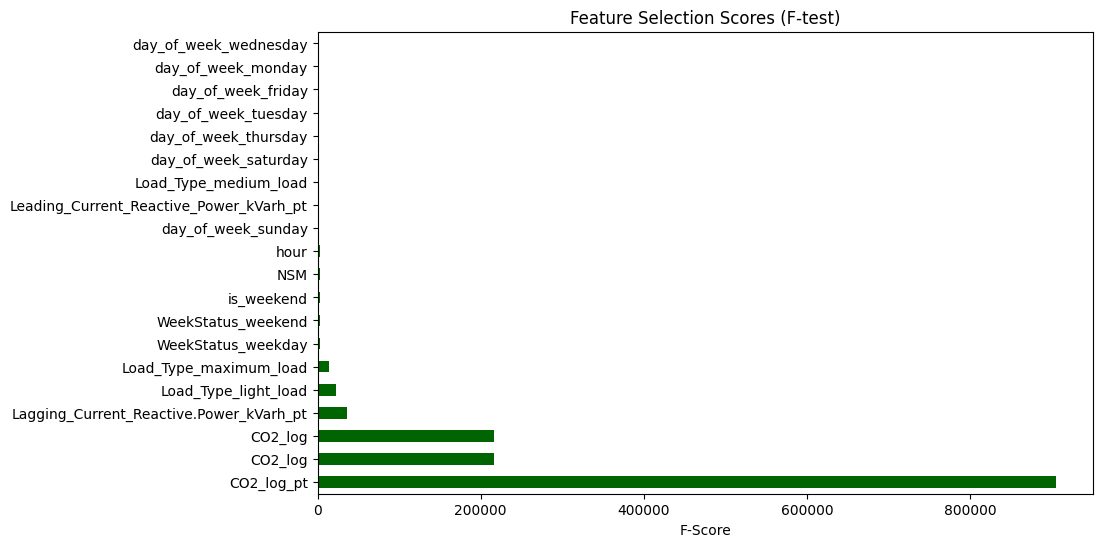

In [45]:
# 11. FEATURE SELECTION (F‑test scores)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_final, y_train)
scores = pd.Series(selector.scores_, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
scores.plot(kind='barh', color='darkgreen')
plt.title("Feature Selection Scores (F‑test)")
plt.xlabel("F‑Score")
plt.show()

#### ***Model Training and Evaluation Function***

##### *This code trains and evaluates six different regression models to predict Usage_log, including hyperparameter tuning for Random Forest and Gradient Boosting using RandomizedSearchCV. Models sensitive to feature scales like KNeighbors and SVR are wrapped in pipelines with StandardScaler to ensure proper performance. The evaluate_model function fits each model, prints key performance metrics (RMSE, MAE, R²), and visualizes predicted vs. actual values and residuals. Hyperparameter search identifies the best settings for Random Forest and Gradient Boosting before evaluation. Finally, results from all models are collected into a summary DataFrame for easy comparison.*

Training and evaluating: LinearRegression
LinearRegression -- RMSE: 0.1660, MAE: 0.1231, R2: 0.9818


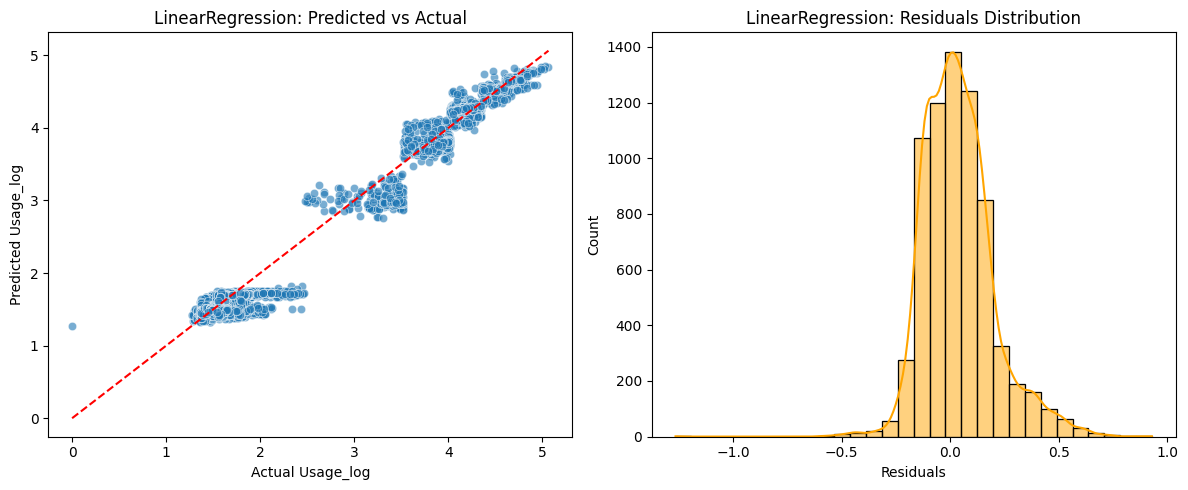

Training and evaluating: RandomForest


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Evaluation function updated with plots and printing
def evaluate_model(model, X_tr, X_te, y_tr, y_te, name="Model", plot=True):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    
    rmse = np.sqrt(mean_squared_error(y_te, y_pred))
    mae = mean_absolute_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    
    print(f"{name} -- RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
    if plot:
        # Plot predicted vs actual
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.scatterplot(x=y_te, y=y_pred, alpha=0.6)
        plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
        plt.xlabel('Actual Usage_log')
        plt.ylabel('Predicted Usage_log')
        plt.title(f'{name}: Predicted vs Actual')

        # Residual plot
        plt.subplot(1,2,2)
        residuals = y_te - y_pred
        sns.histplot(residuals, bins=30, kde=True, color='orange')
        plt.title(f'{name}: Residuals Distribution')
        plt.xlabel('Residuals')
        plt.tight_layout()
        plt.show()
    
    return {"model": name, "RMSE": rmse, "MAE": mae, "R2": r2}

# Hyperparameter tuning grids for RF and GB
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Define models with or without scaling where needed
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNeighbors": Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())]),
    "SVR": Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
    "DecisionTree": DecisionTreeRegressor(random_state=42)
}

results = []

for name, mdl in models.items():
    print(f"Training and evaluating: {name}")
    
    # Hyperparameter tuning for RF and GB
    if name == "RandomForest":
        search = RandomizedSearchCV(mdl, rf_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
        search.fit(X_train_final, y_train)
        best_model = search.best_estimator_
        print(f"Best params for RF: {search.best_params_}")
        metrics = evaluate_model(best_model, X_train_final, X_test_final, y_train, y_test, name)
    
    elif name == "GradientBoosting":
        search = RandomizedSearchCV(mdl, gb_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
        search.fit(X_train_final, y_train)
        best_model = search.best_estimator_
        print(f"Best params for GB: {search.best_params_}")
        metrics = evaluate_model(best_model, X_train_final, X_test_final, y_train, y_test, name)
    
    else:
        metrics = evaluate_model(mdl, X_train_final, X_test_final, y_train, y_test, name)
    
    results.append(metrics)

results_df = pd.DataFrame(results).set_index('model')
print("\nSummary of all models:")
print(results_df)


#### ***Model Comparison***

##### *This code performs hyperparameter tuning using GridSearchCV for the Gradient Boosting Regressor to find the best combination of parameters for minimizing RMSE. After training, it evaluates the tuned model on test data and prints performance metrics.*

In [ ]:
results_df.plot.bar(figsize=(10,6))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

#### *This code performs hyperparameter tuning on the Gradient Boosting Regressor using GridSearchCV to find the best combination of n_estimators, learning_rate, and max_depth. It fits the model on the training data and identifies the optimal parameters that minimize the root mean squared error. The best-tuned model is then evaluated on the test set using the evaluate_model function. Finally, it prints out the best parameters and the performance metrics of the tuned model for interpretation.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV for Gradient Boosting
grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1
)

# Fit the model to training data
grid_gb.fit(X_train_final, y_train)

# Extract the best estimator
best_gb = grid_gb.best_estimator_
print("Best Gradient Boosting parameters:", grid_gb.best_params_)

# Evaluate the best model
best_metrics = evaluate_model(best_gb, X_train_final, X_test_final, y_train, y_test, name="GradientBoosting_Tuned")
print("\nTuned Gradient Boosting Metrics:\n")
print(pd.Series(best_metrics))


#### ***Feature Importance From Tuned***

##### *This code visualizes the top 10 most important features based on the feature importance scores from the trained Gradient Boosting model. The horizontal bar plot highlights which features contribute most to the model’s predictions. Understanding feature importance helps interpret the model and guides future feature engineering efforts.*

In [ ]:
importances = pd.Series(best.feature_importances_, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


#### *This code converts the model’s log-scale predictions back to the original usage scale for easier interpretation. It then compares the first 10 predicted values with the actual usage values in kilowatt-hours (kWh). This comparison helps assess how well the model predicts real-world energy consumption.*

In [ ]:
import numpy as np

# --- Final predictions in log scale
y_pred_log = best.predict(X_test_final)

# --- Convert predictions and actuals back to original scale
y_pred_original = np.expm1(y_pred_log)  # reverse of log1p
y_test_original = np.expm1(y_test)

# --- Display first 10 predicted vs actual usage values
print("\nPredicted vs Actual Usage_kWh:")
for i in range(10):
    print(f"{i+1}. Predicted: {y_pred_original[i]:.2f} kWh | Actual: {y_test_original.iloc[i]:.2f} kWh")


### ***Final Project Conclusion: Steel Industry Energy Prediction***

#### The goal of this project was to build and evaluate regression models to predict energy usage (Usage_log) in the steel industry based on time-based, environmental, and load-related variables. After thorough data preprocessing, feature engineering, transformation, and model experimentation, several models were trained and compared on key performance metrics (RMSE, MAE, and R²).

#### Among all models tested, Gradient Boosting Regressor emerged as the best performer with the lowest RMSE (0.1406), lowest MAE (0.0961), and highest R² (0.987), indicating excellent predictive accuracy and generalization. This suggests that Gradient Boosting captured complex, non-linear relationships in the data effectively, outperforming simpler models like Linear Regression and Decision Trees.

#### In conclusion, with well-preprocessed data and tuned parameters, advanced ensemble models especially Gradient Boosting can provide highly reliable forecasts of energy usage. This can help the steel industry optimize resource planning, reduce energy waste, and make informed operational decisions.
